In [1]:
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ces_model(wage1, wage2, elasticity, a, b):
    # Define the CES production function
    def Y(L, w, K, rho):
        return (K**rho + (L*w)**rho)**(1/rho) / (K + L)

    # Define the return to capital
    def r(L, w, K, rho, Y):
        return (Y - w * L) / K

    # Define the system of equations
    def equations(vars):
        L1, L2, P2 = vars
        K = a - b * (wage1 + wage2) / 2  # Endogenous capital supply
        eq1 = Y(L1, wage1, K, elasticity) - (L1 + K)
        eq2 = Y(L2, wage2, K, elasticity) - P2 * (L2 + K)
        eq3 = r(L1, wage1, K, elasticity, (L1 + K)) - r(L2, wage2, K, elasticity, P2 * (L2 + K))
        return [eq1, eq2, eq3]

    # Solve the system of equations
    solution = optimize.root(equations, (1, 1, 1))
    L1, L2, P2 = solution.x
    K = a - b * (wage1 + wage2) / 2
    return L1, L2, 1, P2, K  # P1 is normalized to 1

def plot_results(wage1, wage2, elasticity, a, b):
    # Define wage range for x-axis
    wage_range = np.linspace(wage1, wage2, 100)

    # Initialize arrays to store results
    labor_demand = np.zeros(len(wage_range))
    prices = np.zeros(len(wage_range))
    capital_demand = np.zeros(len(wage_range))
    total_output = np.zeros(len(wage_range))

    # Populate the arrays by substituting wages
    for i, wage in enumerate(wage_range):
        L1, L2, P1, P2, K = ces_model(wage, wage2, elasticity, a, b)
        labor_demand[i] = L1
        prices[i] = P1
        capital_demand[i] = K
        total_output[i] = L1 * P1

    # Plot the arrays
    plt.figure(figsize=(12, 8))
    plt.plot(wage_range, labor_demand, label="Labor Demand")
    plt.plot(wage_range, prices, label="Price")
    plt.plot(wage_range, capital_demand, label="Capital Demand")
    plt.plot(wage_range, total_output, label="Total Output")
    plt.legend()
    plt.show()

    return labor_demand, prices, capital_demand, total_output

/tmp/ipykernel_18172/2350745026.py:4: RuntimeWarning: invalid value encountered in scalar power
  return (K**rho + (L*w)**rho)**(1/rho) / (K + L)


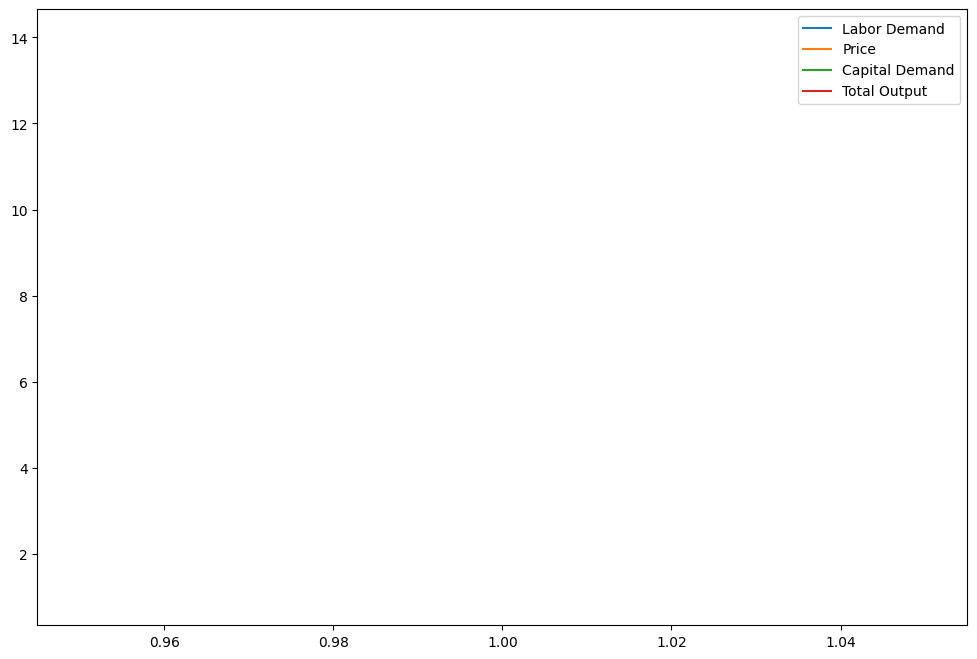

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14.,
        14., 14., 14., 14.,

In [3]:
# Usage example
wage1 = 1
wage2 = 1
elasticity = 0.5
a = 15  # Choose suitable values for a and b based on your specific context
b = 1

plot_results(wage1, wage2, elasticity, a, b)